In [9]:
import pandas as pd

In [24]:
data = pd.read_csv("/home/rogia/Documents/classification - twosides_socc.tsv", sep="\t", index_col=0)
data

,side_effect,count,system_organ_class,HLGT,HLT,PT
0,thrombocytopenia,17060,Blood and lymphatic system disorders,Platelet disorders,Thrombocytopenias,Thrombocytopenia
1,bilirubinaemia,7441,Hepatobiliary disorders,Hepatic and hepatobiliary disorders,Hepatic enzymes and function abnormalities,Bilirubin excretion disorder
2,bacterial infection,8928,Infections and infestations,Bacterial infectious disorders,Bacterial infections NEC,Bacterial infection
3,haematochezia,8355,Gastrointestinal disorders,Gastrointestinal haemorrhages NEC,Non-site specific gastrointestinal haemorrhages,Haematochezia
4,hepatic failure,8479,Hepatobiliary disorders,Hepatic and hepatobiliary disorders,Hepatic failure and associated disorders,Hepatic failure
5,icterus,7944,Hepatobiliary disorders,Hepatic and hepatobiliary disorders,Hepatic fibrosis and cirrhosis,Bilirubin excretion disorder
6,body temperature increased,21806,General disorders and administration site cond...,Body temperature conditions,Body temperature altered,Hyperthermia
7,sepsis,16575,Infections and infestations,Infections - pathogen unspecified,"Sepsis, bacteraemia, viraemia and fungaemia NEC",Sepsis
8,abnormal lfts,10960,Hepatobiliary disorders,NaN,NaN,Liver function test abnormal
9,fungal disease,8455,Infections and infestations,Fungal infectious disorders,Fungal infections NEC,fungal disease


In [3]:
res = data.groupby(['HLGT'], as_index=False).sum()
res

,HLGT,count
0,Abdominal hernias and other abdominal wall con...,16071
1,Abortions and stillbirth,1482
2,Acid-base disorders,40458
3,Adjustment disorders (incl subtypes),972
4,Allergic conditions,76113
5,Anaemias nonhaemolytic and marrow depression,46764
6,Anal and rectal conditions NEC,5140
7,Aneurysms and artery dissections,5540
8,"Anterior eye structural change, deposit and de...",7425
9,Anxiety disorders and symptoms,40613


In [31]:
res2 = data.groupby(['HLT'], as_index=False).sum()
res2

,HLT,count
0,Abdominal hernias NEC,2750
1,Abnormal sleep-related events,3348
2,Abortions spontaneous,1482
3,Absence seizures,3164
4,Accelerated and malignant hypertension,1355
5,Acnes,3495
6,Acquired immunodeficiency syndromes,593
7,Acute and chronic pancreatitis,21057
8,Acute and chronic sarcoidosis,1579
9,Adjustment disorders,972


In [5]:
len(data['PT'].value_counts())

933

In [6]:
len(data['HLT'].value_counts())

504

In [7]:
len(data['HLGT'].value_counts())

203

In [8]:
data['system_organ_class'].value_counts()

Gastrointestinal disorders                                             101
Nervous system disorders                                                94
Musculoskeletal and connective tissue disorders                         80
Infections and infestations                                             62
Vascular disorders                                                      57
Respiratory, thoracic and mediastinal disorders                         56
Cardiac disorders                                                       55
Metabolism and nutrition disorders                                      52
Skin and subcutaneous tissue disorders                                  48
Reproductive system and breast disorders                                44
Renal and urinary disorders                                             42
Psychiatric disorders                                                   41
Neoplasms benign, malignant and unspecified (incl cysts and polyps)     37
Immune system disorders  

In [9]:
len(data['system_organ_class'].value_counts())

25

In [10]:
dx= data.groupby('system_organ_class', as_index=False).sum()
dx

,system_organ_class,count
0,Blood and lymphatic system disorders,163613
1,Cardiac disorders,393336
2,"Congenital, familial and genetic disorders",3774
3,Ear and labyrinth disorders,33751
4,Endocrine disorders,37446
5,Eye disorders,73411
6,Gastrointestinal disorders,504938
7,General disorders and administration site cond...,213948
8,Hepatobiliary disorders,137986
9,Immune system disorders,132278


In [11]:
dx.nlargest(5, 'count')

,system_organ_class,count
6,Gastrointestinal disorders,504938
15,Nervous system disorders,451185
1,Cardiac disorders,393336
12,Metabolism and nutrition disorders,374053
13,Musculoskeletal and connective tissue disorders,348947


In [12]:
y = data.groupby(['system_organ_class', 'HLGT', 'HLT', 'PT'], as_index=False).sum()
y = y[y['system_organ_class'].isin(['Gastrointestinal disorders',  'Nervous system disorders',
 'Cardiac disorders',
 'Metabolism and nutrition disorders',
 ])]
y.groupby(['system_organ_class', 'HLGT'], as_index=True).max()

HLT  \
system_organ_class                 HLGT                                                                                                    
Cardiac disorders                  Cardiac arrhythmias                                        Ventricular arrhythmias and cardiac arrest   
                                   Cardiac disorder signs and symptoms                                                         Dyspnoeas   
                                   Cardiac valve disorders                                                     Mitral valvular disorders   
                                   Coronary artery disorders                                         Ischaemic coronary artery disorders   
                                   Endocardial disorders                                                                Endocarditis NEC   
                                   Heart failures                                                             Right ventricular failures   
                                   Myocardial disorders                                                        Noninfectious myocarditis   
                                   Pericardial disorders                                                       Pericardial disorders NEC   
Gastrointestinal disorders         Abdominal hernias and other abdominal wall cond...                                  Umbilical hernias   
                                   Anal and rectal conditions NEC                                                  Anal and rectal pains   
                                   Benign neoplasms gastrointestinal                   Benign neoplasms gastrointestinal (excl oral c...   
                                   Cardiac arrhythmias                                        Ventricular arrhythmias and cardiac arrest   
                                   Dental and gingival conditions                                                         Gingival pains   
                                   Diverticular disorders                                                     Diverticulum inflammations   
                                   Embolism and thrombosis                                            Peripheral embolism and thrombosis   
                                   Exocrine pancreas conditions                                              Cystic pancreatic disorders   
                                   Gastrointestinal conditions NEC                                             Gastrointestinal fistulae   
                                   Gastrointestinal haemorrhages NEC                     Non-site specific gastrointestinal haemorrhages   
                                   Gastrointestinal infections                                                     Peritoneal infections   
                                   Gastrointestinal inflammatory conditions                                     Rectal inflammations NEC   
                                   Gastrointestinal motility and defaecation condi...                               Non-mechanical ileus   
                                   Gastrointestinal signs and symptoms                                      Nausea and vomiting symptoms   
                                   Gastrointestinal stenosis and obstruction                        Oesophageal stenosis and obstruction   
                                   Gastrointestinal ulceration and perforation                        Oesophageal ulcers and perforation   
                                   Malignant and unspecified neoplasms gastrointes...                    Oesophageal neoplasms malignant   
                                   Oral soft tissue conditions                                                 Stomatitis and ulceration   
                                   Salivary gland conditions                                 Salivary gland infections and inflammations   
                                   Tongue conditions                     

In [13]:
a = [[i] for i in data.groupby('system_organ_class').groups.keys()]
a

[['Blood and lymphatic system disorders'],
 ['Cardiac disorders'],
 ['Congenital, familial and genetic disorders'],
 ['Ear and labyrinth disorders'],
 ['Endocrine disorders'],
 ['Eye disorders'],
 ['Gastrointestinal disorders'],
 ['General disorders and administration site conditions'],
 ['Hepatobiliary disorders'],
 ['Immune system disorders'],
 ['Infections and infestations'],
 ['Injury, poisoning and procedural complications'],
 ['Metabolism and nutrition disorders'],
 ['Musculoskeletal and connective tissue disorders'],
 ['Neoplasms benign, malignant and unspecified (incl cysts and polyps)'],
 ['Nervous system disorders'],
 ['Pregnancy, puerperium and perinatal conditions'],
 ['Psychiatric disorders'],
 ['Renal and urinary disorders'],
 ['Reproductive system and breast disorders'],
 ['Respiratory, thoracic and mediastinal disorders'],
 ['Skin and subcutaneous tissue disorders'],
 ['Social circumstances'],
 ['Unspecified'],
 ['Vascular disorders']]

In [49]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


%matplotlib inline

sns.set_context("paper", font_scale=1)
# Set the font to be serif, rather than sans
sns.set(font='serif')
sns.set_style("ticks", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
}) 
sns.set_style({"xtick.direction": "out", "ytick.direction": "in"})

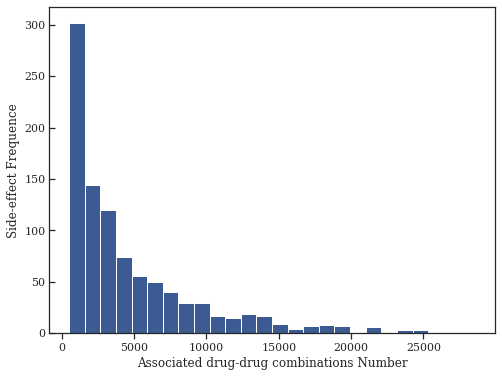

In [15]:
plt.figure(figsize=(8, 6))
ax = sns.distplot(data['count'], kde=False, color=sns.xkcd_rgb['denim blue'],hist_kws={"alpha": 1})
ax.set_xlabel('Associated drug-drug combinations Number')
ax.set_ylabel('Side-effect Frequence')

plt.savefig("figures/twosides_histogram_of_the_associated_drugp_number_for_se.png")

In [16]:
side_effect_index = dict(zip(data['side_effect'].values, range(len(data))))
side_effect_index

{'thrombocytopenia': 0,
 'bilirubinaemia': 1,
 'bacterial infection': 2,
 'haematochezia': 3,
 'hepatic failure': 4,
 'icterus': 5,
 'body temperature increased': 6,
 'sepsis': 7,
 'abnormal lfts': 8,
 'fungal disease': 9,
 'pancreatitis': 10,
 'arterial pressure nos decreased': 11,
 'difficulty breathing': 12,
 'anaemia': 13,
 'heart rate increased': 14,
 'road traffic accident': 15,
 'afib': 16,
 'sinus tachycardia': 17,
 'anaphylactic reaction': 18,
 'dizziness': 19,
 'arteriosclerotic heart disease': 20,
 'heart attack': 21,
 'angina': 22,
 'femur fracture': 23,
 'cough': 24,
 'cervical vertebral fracture': 25,
 'aspiration pneumonia': 26,
 'anxiety': 27,
 'tinnitus': 28,
 'edema': 29,
 'infection viral': 30,
 'cardiac decompensation': 31,
 'lung infiltration': 32,
 'cardiac enlargement': 33,
 'insomnia': 34,
 'bleeding hemorrhoids': 35,
 'extrasystoles ventricular': 36,
 'drug hypersensitivity': 37,
 'pleural pain': 38,
 'embolism pulmonary': 39,
 'erosive gastritis': 40,
 'neurop

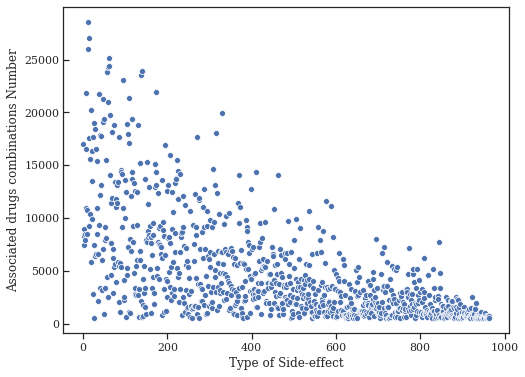

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=data.index, y=data['count'].values)
ax.set_xlabel('Type of Side-effect')
ax.set_ylabel('Associated drugs combinations Number')
plt.savefig("figures/twosides_se_index_plot.png")

In [30]:
soc_index = dict(zip(list(set(data['system_organ_class'].values)),range(len(data['system_organ_class'].value_counts()))))
soc_index

{'Immune system disorders': 0,
 'Blood and lymphatic system disorders': 1,
 'Psychiatric disorders': 2,
 'Vascular disorders': 3,
 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)': 4,
 'Injury, poisoning and procedural complications': 5,
 'Ear and labyrinth disorders': 6,
 'Gastrointestinal disorders': 7,
 'General disorders and administration site conditions': 8,
 'Skin and subcutaneous tissue disorders': 9,
 'Metabolism and nutrition disorders': 10,
 'Nervous system disorders': 11,
 'Respiratory, thoracic and mediastinal disorders': 12,
 'Pregnancy, puerperium and perinatal conditions': 13,
 'Endocrine disorders': 14,
 'Reproductive system and breast disorders': 15,
 'Social circumstances': 16,
 'Congenital, familial and genetic disorders': 17,
 'Hepatobiliary disorders': 18,
 'Infections and infestations': 19,
 'Renal and urinary disorders': 20,
 'Musculoskeletal and connective tissue disorders': 21,
 'Unspecified': 22,
 'Eye disorders': 23,
 'Cardiac disorders'

In [19]:
soc_index_2 = dict(zip(list(set(data['system_organ_class'].values)),data['system_organ_class'].value_counts()))
soc_index_2

{'Neoplasms benign, malignant and unspecified (incl cysts and polyps)': 101,
 'Eye disorders': 94,
 'Cardiac disorders': 80,
 'Social circumstances': 62,
 'Ear and labyrinth disorders': 57,
 'Injury, poisoning and procedural complications': 56,
 'General disorders and administration site conditions': 55,
 'Skin and subcutaneous tissue disorders': 52,
 'Psychiatric disorders': 48,
 'Infections and infestations': 44,
 'Endocrine disorders': 42,
 'Vascular disorders': 41,
 'Gastrointestinal disorders': 37,
 'Hepatobiliary disorders': 36,
 'Unspecified': 33,
 'Nervous system disorders': 28,
 'Pregnancy, puerperium and perinatal conditions': 25,
 'Blood and lymphatic system disorders': 21,
 'Musculoskeletal and connective tissue disorders': 16,
 'Reproductive system and breast disorders': 13,
 'Renal and urinary disorders': 11,
 'Respiratory, thoracic and mediastinal disorders': 5,
 'Congenital, familial and genetic disorders': 3,
 'Immune system disorders': 2,
 'Metabolism and nutrition di

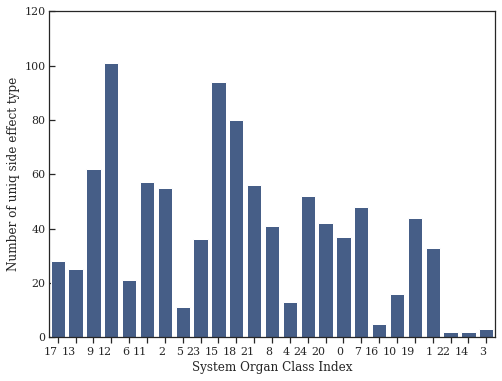

In [20]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='system_organ_class', data=data, color=sns.xkcd_rgb['denim blue'])
ax.set_xlabel('System Organ Class Index')
ax.set_ylabel('Number of uniq side effect type')
ax.set_ylim(0,100)
ax.set_ylim(0,120)
ax.set_xticklabels([soc_index[label.get_text()] for label in list(ax.get_xticklabels())], rotation=0, horizontalalignment='right')

 
plt.savefig("figures/twosides_soc_se_count.png")

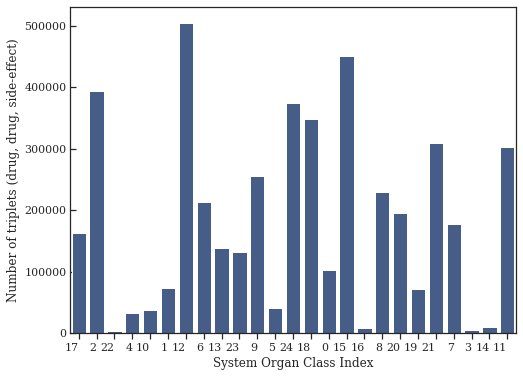

In [21]:
# SOC
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='system_organ_class',  y = 'count', data=dx, color=sns.xkcd_rgb['denim blue'])
ax.set_xlabel('System Organ Class Index')
ax.set_ylabel('Number of triplets (drug, drug, side-effect)')
#ax.set_ylim(0,100)
#ax.set_ylim(0,120)
ax.set_xticklabels([soc_index[label.get_text()] for label in list(ax.get_xticklabels())], rotation=0, horizontalalignment='right')

plt.savefig("figures/twosides_soc_triplet_count.png")

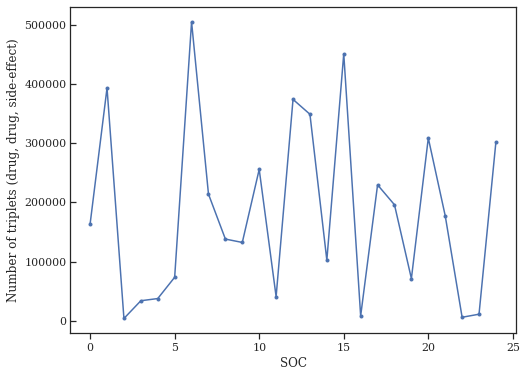

In [72]:
dx['id'] = dx.index
plt.figure(figsize=(8, 6))

plt.plot('id',  'count', data=dx, marker='.')
plt.xlabel('SOC')
plt.ylabel('Number of triplets (drug, drug, side-effect)')
#ax.set_xticklabels(list(res2.index), rotation=0, horizontalalignment='right')

plt.savefig("figures/SOC.png")

In [27]:
len(res['count'].values)

203

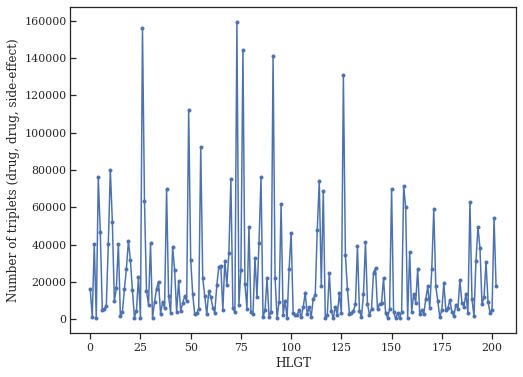

In [78]:
res['id'] = res.index
plt.figure(figsize=(8, 6))

plt.plot('id',  'count', data=res, marker='.')
plt.xlabel('HLGT')
plt.ylabel('Number of triplets (drug, drug, side-effect)')
plt.savefig("figures/HLGT.png")

In [52]:
len(res2.index)

504

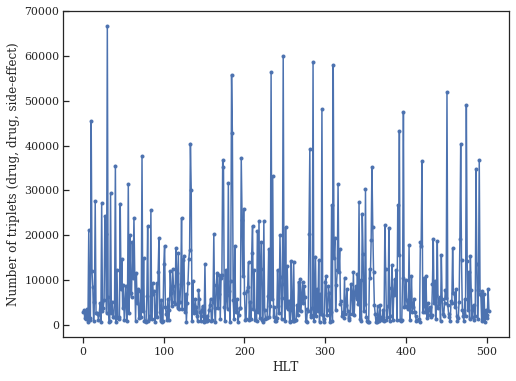

In [79]:
res2['id'] = res2.index
plt.figure(figsize=(8, 6))

plt.plot('id',  'count', data=res2, marker='.')
plt.xlabel('HLT')
plt.ylabel('Number of triplets (drug, drug, side-effect)')
#ax.set_ylim(0,100)
#ax.set_ylim(0,120)
#
#ax.set_xticklabels(list(res2.index), rotation=0, horizontalalignment='right')

plt.savefig("figures/HLT.png")

[Text(0, 0, '1'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '3'),
 Text(0, 0, '24'),
 Text(0, 0, '5'),
 Text(0, 0, '0'),
 Text(0, 0, '11'),
 Text(0, 0, '21'),
 Text(0, 0, '12'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '10'),
 Text(0, 0, '20'),
 Text(0, 0, '4'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '23'),
 Text(0, 0, '17'),
 Text(0, 0, '22'),
 Text(0, 0, '16')]

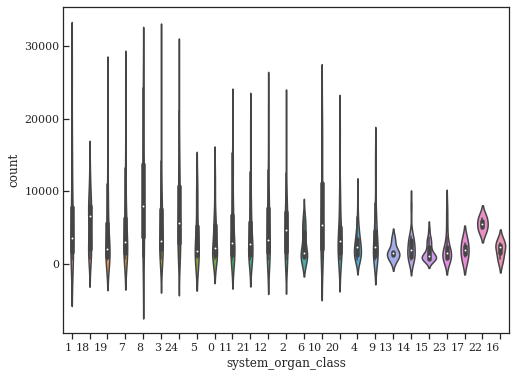

In [31]:
plt.figure(figsize=(8, 6))
ax = sns.violinplot(x="system_organ_class", y = "count", data=data)
ax.set_xticklabels([soc_index[label.get_text()] for label in list(ax.get_xticklabels())], rotation=0, horizontalalignment='right')


<Figure size 576x432 with 0 Axes>

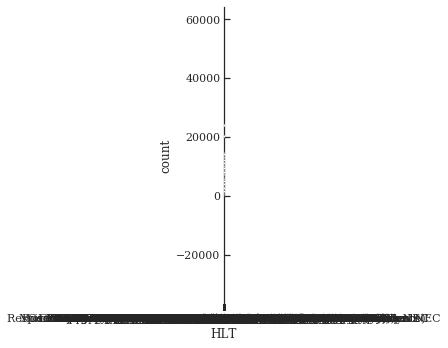

In [54]:
plt.figure(figsize=(8, 6))
ax = sns.catplot(x="HLT", y = "count", data=data, jitter=False, kind="violin")
#ax.set_xticklabels([soc_index[label.get_text()] for label in list(ax.get_xticklabels())], rotation=0, horizontalalignment='right')


In [55]:
import matplotlib.pyplot as plt
import networkx as nx

In [81]:
soc = data.groupby('system_organ_class')
system_organ, ass_side_effect = [s for s, _ in soc], [v.values.tolist() for _, v in soc], 
print(system_organ, ass_side_effect)
 

['Blood and lymphatic system disorders', 'Cardiac disorders', 'Congenital, familial and genetic disorders', 'Ear and labyrinth disorders', 'Endocrine disorders', 'Eye disorders', 'Gastrointestinal disorders', 'General disorders and administration site conditions', 'Hepatobiliary disorders', 'Immune system disorders', 'Infections and infestations', 'Injury, poisoning and procedural complications', 'Metabolism and nutrition disorders', 'Musculoskeletal and connective tissue disorders', 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)', 'Nervous system disorders', 'Pregnancy, puerperium and perinatal conditions', 'Psychiatric disorders', 'Renal and urinary disorders', 'Reproductive system and breast disorders', 'Respiratory, thoracic and mediastinal disorders', 'Skin and subcutaneous tissue disorders', 'Social circumstances', 'Unspecified', 'Vascular disorders'] [[['thrombocytopenia', 17060, 'Blood and lymphatic system disorders', 'Platelet disorders', 'Thrombocytopeni

Blood and lymphatic system disorders
Cardiac disorders


/home/rogia/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Congenital, familial and genetic disorders
Ear and labyrinth disorders
Endocrine disorders
Eye disorders
Gastrointestinal disorders
General disorders and administration site conditions
Hepatobiliary disorders
Immune system disorders
Infections and infestations
Injury, poisoning and procedural complications
Metabolism and nutrition disorders
Musculoskeletal and connective tissue disorders
Neoplasms benign, malignant and unspecified (incl cysts and polyps)
Nervous system disorders
Pregnancy, puerperium and perinatal conditions
Psychiatric disorders
Renal and urinary disorders
Reproductive system and breast disorders
Respiratory, thoracic and mediastinal disorders


/home/rogia/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Skin and subcutaneous tissue disorders
Social circumstances
Unspecified
Vascular disorders


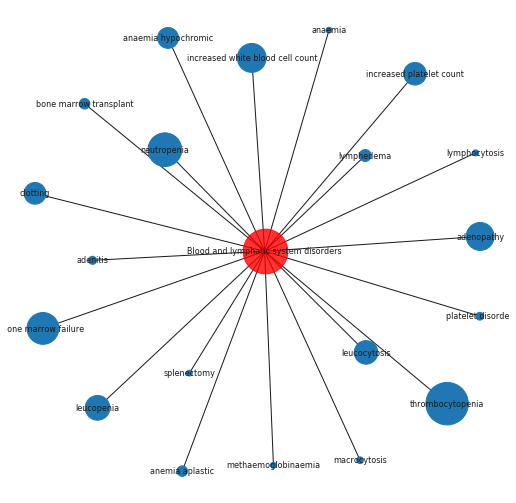

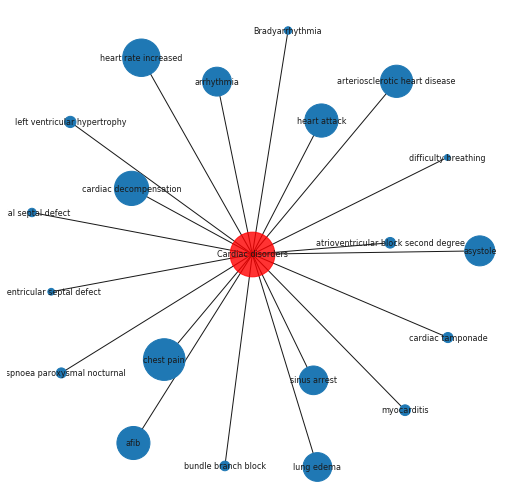

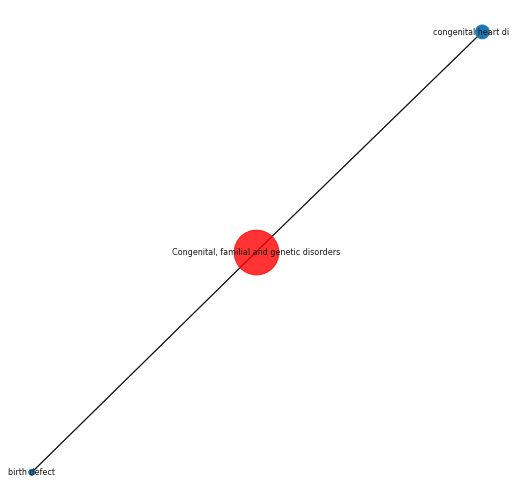

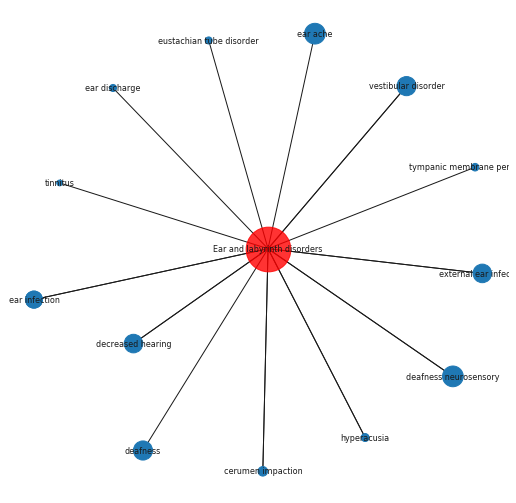

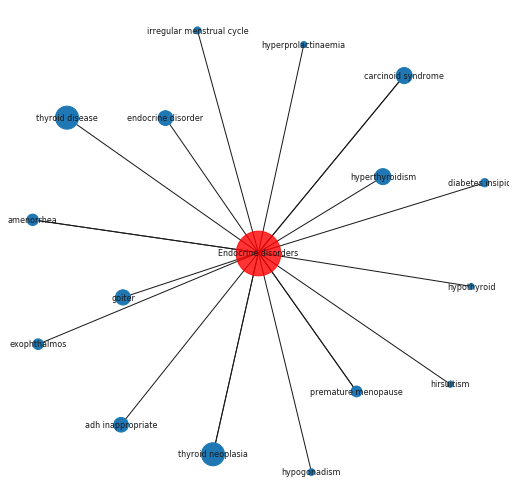

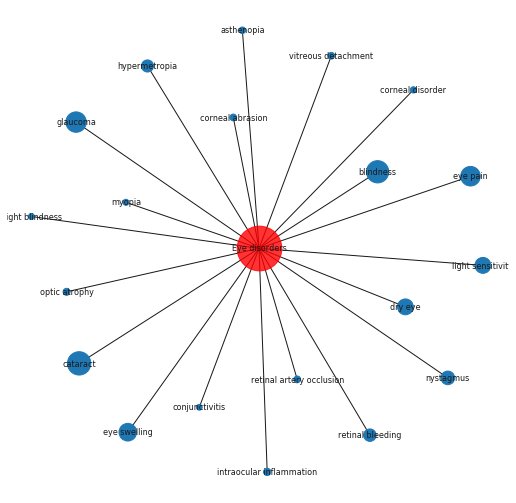

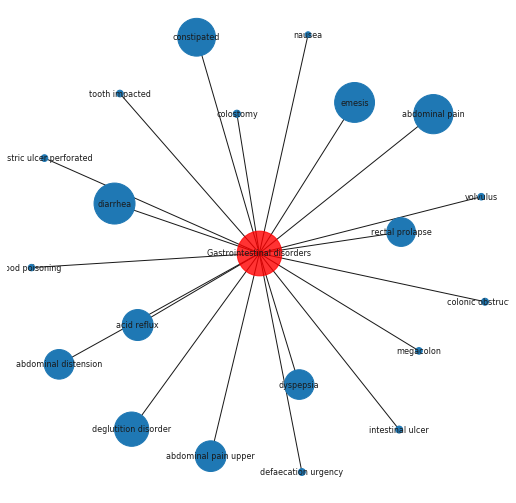

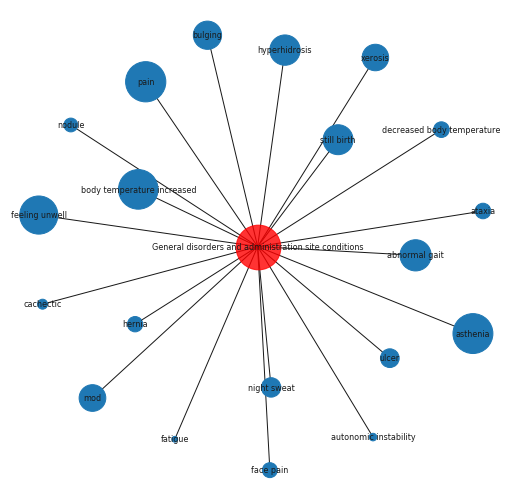

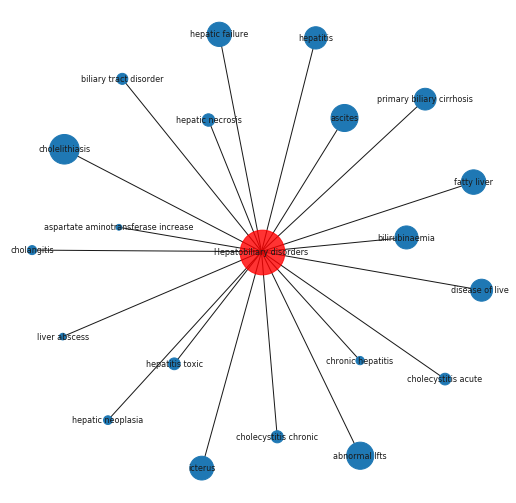

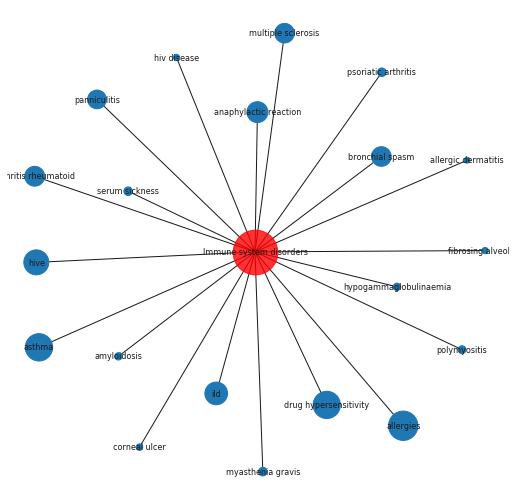

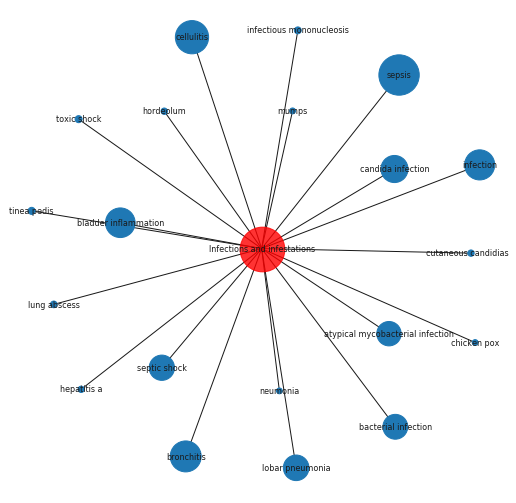

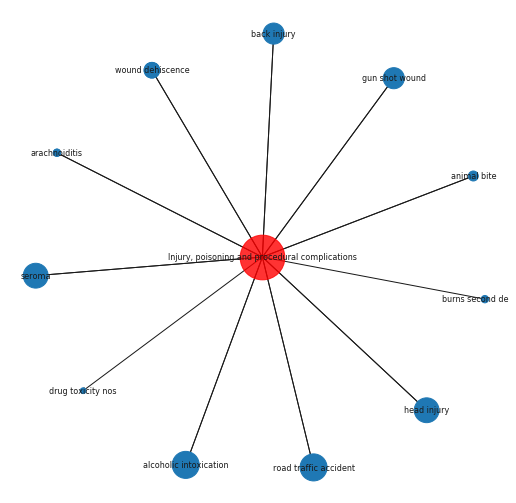

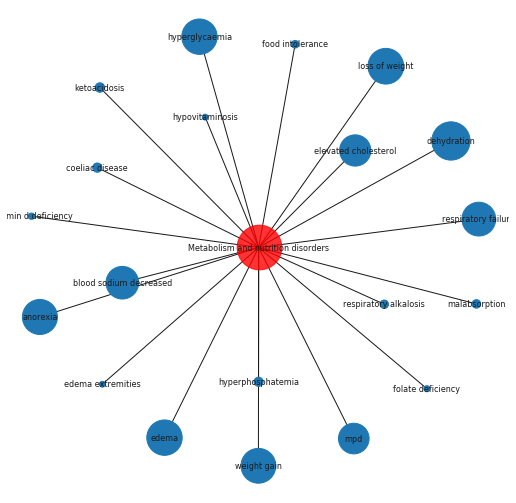

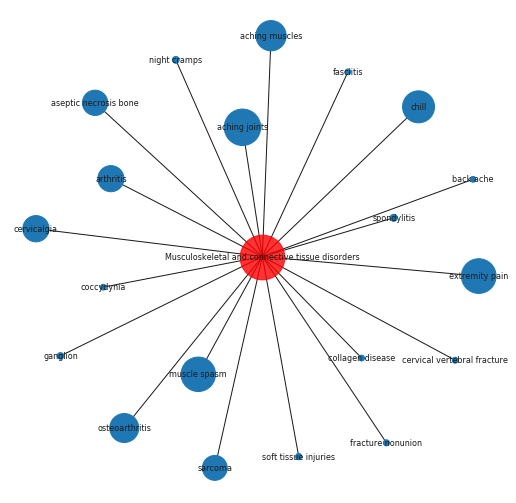

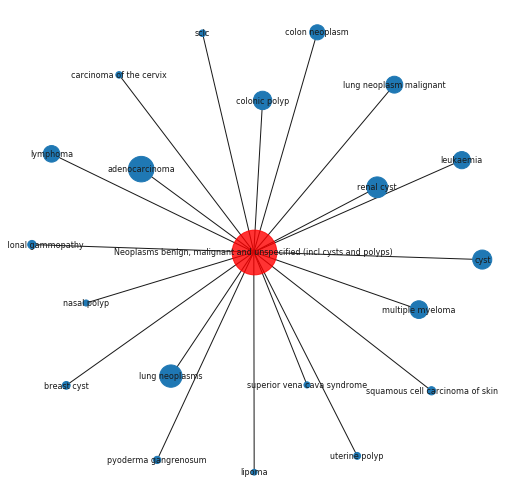

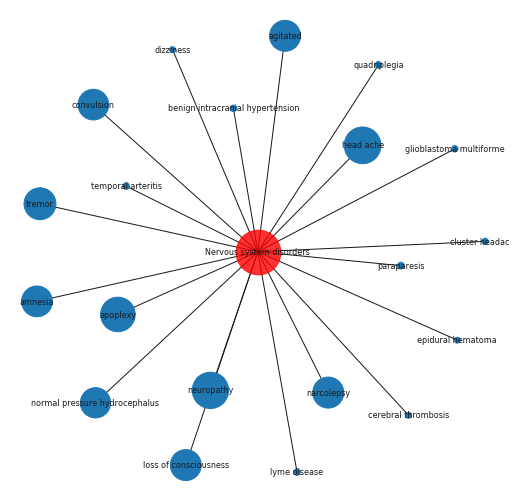

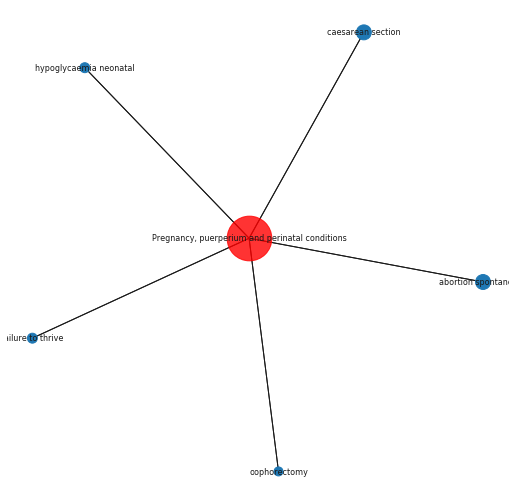

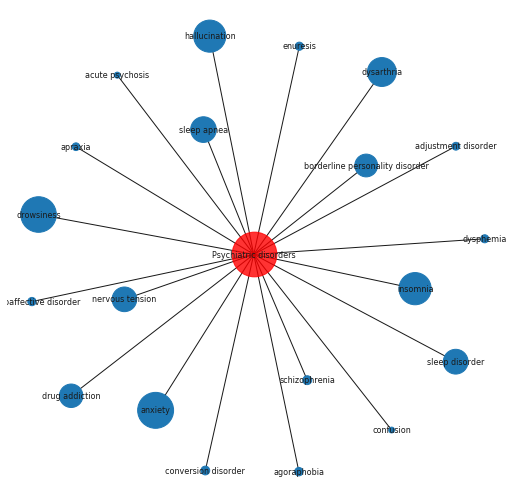

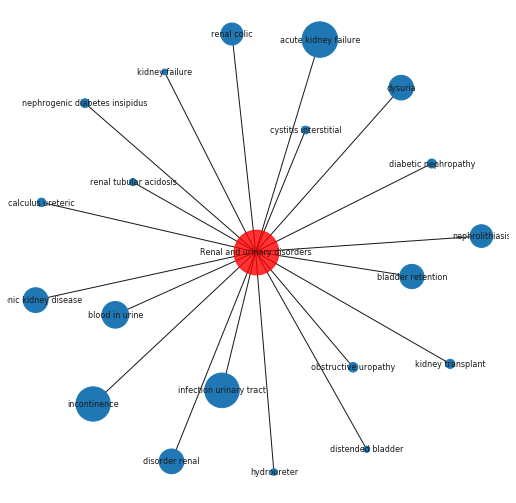

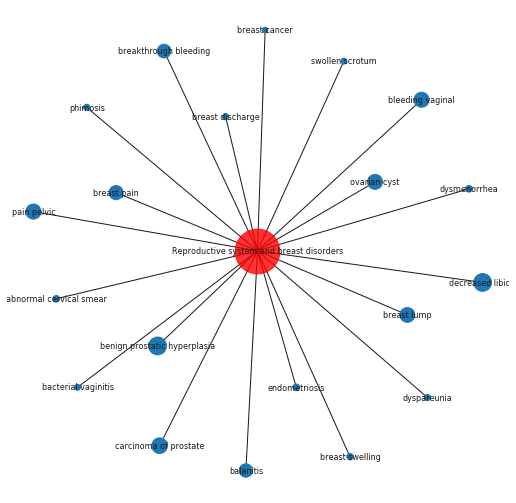

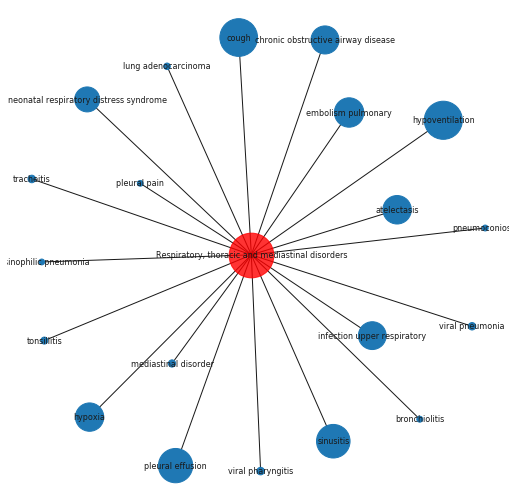

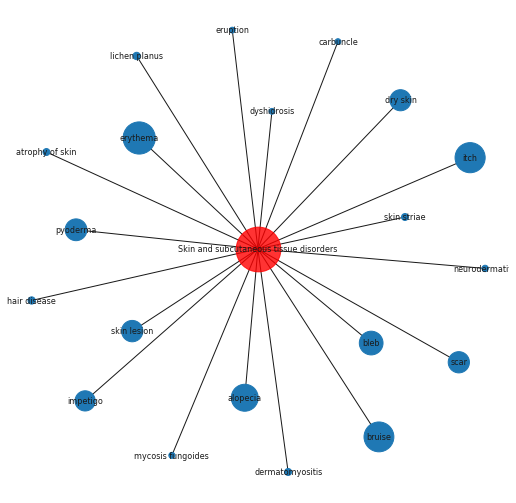

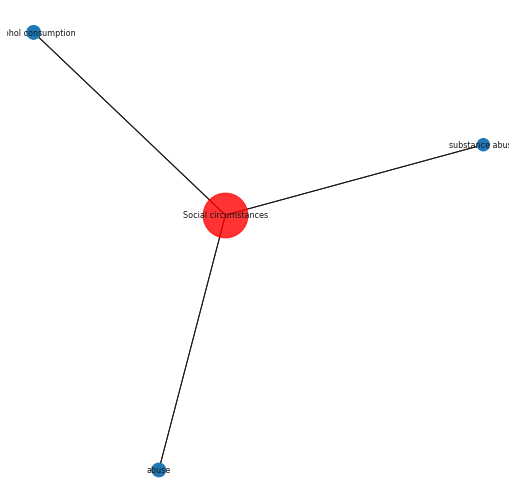

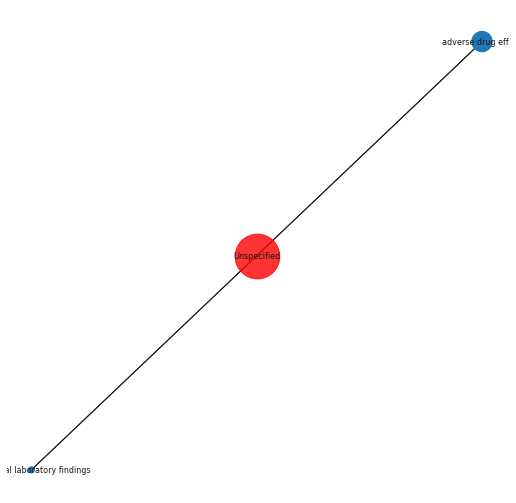

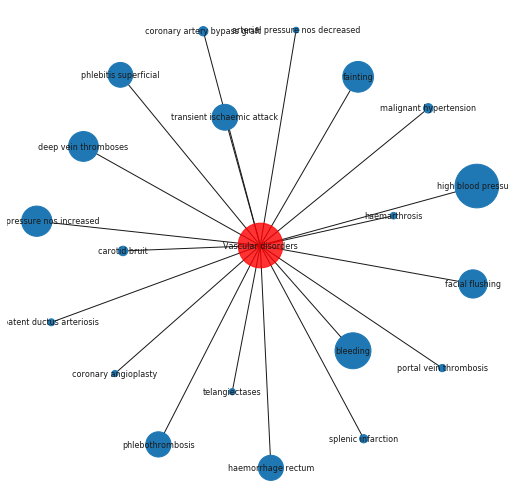

In [82]:
import math
from heapq import nlargest , nsmallest

for i, name in enumerate(system_organ):
    print(name)
    plt.figure(figsize=(9, 9))
    G = nx.Graph()
    val_map = {s[0]:s[1] for s in ass_side_effect[i]}
    top_ten = nlargest(10, val_map, key = val_map.get) 
    worst_ten = nsmallest(10, val_map, key = val_map.get) 
    edges = [(name, s) for s in top_ten] + [(name, s) for s in worst_ten]
    snodes =[dst for (src, dst) in edges ]
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    values = [val_map.get(node, 500)/15 for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, nodelist=snodes, node_size=values)
    nx.draw_networkx_nodes(G,pos,
                       nodelist=[name],
                       node_color="red",
                       node_size=2000,
                   alpha=0.8)
    
    nx.draw_networkx_labels(G, pos, font_size=8)
    nx.draw_networkx_edges(G, pos, edgelist=edges, arrows=False)
    plt.axis('off')
    plt.savefig(f"figures/clusters/{name}-cluster.png")

## Performances

In [1]:
dir_path = "/home/rogia/Documents/analysis/rapport"
drugb_inv_outfile = "druud-inv-drugbank-seeds.xlsx"  # drug inv
twos_inv_outfile = "druud-inv-twosides-seeds.xlsx"  # twosides inv
twos_rand_outfile = "druud-twosides-m-seed.xlsx" # twoside rand
drugb_rand_outfile = "druuud-dgb-m-seed.xlsx"  # drugbank rand

In [2]:
dd_twos_inv_outfile = "deepddi-inv-twosides-seeds.xlsx" # twoside in
dd_twos_rand_outfile = "deepddi-twoside-m-seed.xlsx"
dd_drugb_inv_outfile = "deepddi-inv-dgb-seeds.xlsx"
dd_drugb_rand_outfile = "replication.xlsx"

In [3]:
output_path='/home/rogia/Documents/analysis/results/MEDRA'
out =  "/home/rogia/Documents/analysis/results/test_medra+deepddi"
out_path = "/home/rogia/Documents/analysis/results/MEDRA_UNZ"

In [7]:
import pandas as pd
from side_effects.graphics import describe_all_experiments

In [14]:
d = pd.read_excel(f"{dir_path}/{drugb_inv_outfile}", sep="\t", index_col=0)
d

,micro auprc,micro roc auc,random seed
0,0.685629,0.984656,350
1,0.717877,0.986989,0
2,0.732574,0.985698,33
3,0.734003,0.987373,55
4,0.633430,0.980679,21
5,0.755696,0.981721,64
6,0.674254,0.984740,101
7,0.674198,0.984434,505
8,0.688678,0.985306,10
9,0.715938,0.986053,42


In [15]:
e = pd.read_excel(f"{dir_path}/{drugb_rand_outfile}", sep="\t", index_col=0)
e

,micro auprc,micro roc auc,seed
0,0.987371,0.999600,350
1,0.988097,0.999507,505
2,0.988109,0.999655,0
3,0.987815,0.999630,33
4,0.987593,0.999462,101
5,0.987264,0.999613,64
6,0.987846,0.999530,10
7,0.987700,0.999595,55
8,0.986203,0.999397,21
9,0.986710,0.999521,42


In [16]:
f = pd.read_excel(f"{dir_path}/{dd_drugb_inv_outfile}", sep="\t", index_col=0)
f

,micro auprc,micro roc auc,random seed
0,0.685458,0.970322,101
1,0.674844,0.970909,350
2,0.727593,0.978613,0
3,0.718434,0.973495,64
4,0.735152,0.977946,10
5,0.721506,0.977224,55
6,0.684882,0.974824,505
7,0.696188,0.974136,33
8,0.619689,0.966323,21
9,0.641651,0.973589,42


In [17]:
g = pd.read_excel(f"{dir_path}/{dd_drugb_rand_outfile}", sep="\t", index_col=0)
g

,macro accuracy,macro f1,macro precision,macro recall,micro f1,micro precision,micro recall,micro roc auc,micro auprc,seed
0,0.998033,0.833197,0.908459,0.804769,0.915467,0.916493,0.914443,0.998696,0.962926,0
1,0.998018,0.854369,0.890807,0.842347,0.914885,0.915004,0.914766,0.998794,0.963813,64
2,0.997985,0.824022,0.867780,0.798786,0.913354,0.914999,0.911715,0.998307,0.959732,55
3,0.997872,0.807802,0.863551,0.780553,0.908430,0.910697,0.906174,0.998663,0.961598,42
4,0.997994,0.809042,0.855429,0.776284,0.913785,0.914595,0.912977,0.998750,0.962896,101
5,0.998023,0.813762,0.878582,0.781541,0.915052,0.915683,0.914421,0.998816,0.962434,350
6,0.997925,0.833704,0.884194,0.812590,0.910784,0.912175,0.909398,0.998437,0.957485,21
7,0.997976,0.832468,0.858058,0.821539,0.913028,0.913635,0.912423,0.998789,0.963631,33
8,0.998039,0.828332,0.880107,0.805929,0.915724,0.916452,0.914998,0.998712,0.963570,10
9,0.998059,0.820778,0.844013,0.824589,0.916546,0.917682,0.915413,0.998751,0.964680,505


In [18]:
recap = pd.DataFrame()
recap["model"] = ["Ours"] * len(d)
recap["set up"] = ["early stage"] * len(d)
recap["seed"] = d["random seed"]
recap["AUROC"] =  d["micro roc auc"]
recap["AUCPR"] =  d["micro auprc"]

recap2 = pd.DataFrame()
recap2["model"] = ["Ours"] * len(e)
recap2["set up"] = ["random"] * len(e)
recap2["seed"] = e["seed"]
recap2["AUROC"] =  e["micro roc auc"]
recap2["AUCPR"] =  e["micro auprc"]


recap3 = pd.DataFrame()
recap3["model"] = ["DeepDDI"] * len(f)
recap3["set up"] = ["early stage"] * len(f)
recap3["seed"] = f["random seed"]
recap3["AUROC"] =  f["micro roc auc"]
recap3["AUCPR"] =  f["micro auprc"]


recap4 = pd.DataFrame()
recap4["model"] = ["DeepDDI"] * len(g)
recap4["set up"] = ["random"] * len(g)
recap4["seed"] = g["seed"]
recap4["AUROC"] =  g["micro roc auc"]
recap4["AUCPR"] =  g["micro auprc"]

result = pd.concat([recap, recap2, recap3, recap4], ignore_index=True)
result

,model,set up,seed,AUROC,AUCPR
0,Ours,early stage,350,0.984656,0.685629
1,Ours,early stage,0,0.986989,0.717877
2,Ours,early stage,33,0.985698,0.732574
3,Ours,early stage,55,0.987373,0.734003
4,Ours,early stage,21,0.980679,0.633430
5,Ours,early stage,64,0.981721,0.755696
6,Ours,early stage,101,0.984740,0.674254
7,Ours,early stage,505,0.984434,0.674198
8,Ours,early stage,10,0.985306,0.688678
9,Ours,early stage,42,0.986053,0.715938


In [19]:
a = result.groupby(["model", "set up"])["AUROC", "AUCPR"].mean()
a

AUROC     AUCPR
model   set up                         
DeepDDI early stage  0.973738  0.690540
        random       0.998671  0.962276
Ours    early stage  0.984765  0.701228
        random       0.999551  0.987471

In [20]:
# drugbank - roc
plt.figure(figsize=(8, 6))
sns.boxplot(x="set up",y="AUROC",hue="model",data=result, palette="coolwarm")
plt.savefig("figures/drugb_roc.png")

NameError: name 'plt' is not defined

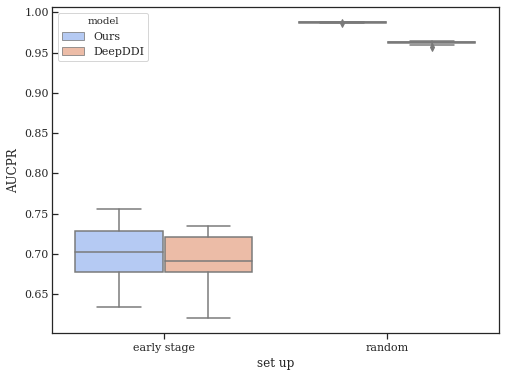

In [146]:
# drugbank - auprc
plt.figure(figsize=(8, 6))
sns.boxplot(x="set up",y="AUCPR",hue="model",data=result, palette="coolwarm")
plt.savefig("figures/drugb_aup.png")

In [21]:
# Twosides
d = pd.read_excel(f"{dir_path}/{twos_inv_outfile}", sep="\t", index_col=0)
e = pd.read_excel(f"{dir_path}/{twos_rand_outfile}", sep="\t", index_col=0)
f = pd.read_excel(f"{dir_path}/{dd_twos_inv_outfile}", sep="\t", index_col=0)
g = pd.read_excel(f"{dir_path}/{dd_twos_rand_outfile}", sep="\t", index_col=0)

recap = pd.DataFrame()
recap["model"] = ["Ours"] * len(d)
recap["set up"] = ["early stage"] * len(d)
recap["seed"] = d["random seed"]
recap["AUROC"] =  d["micro roc auc"]
recap["AUCPR"] =  d["micro auprc"]

recap2 = pd.DataFrame()
recap2["model"] = ["Ours"] * len(e)
recap2["set up"] = ["random"] * len(e)
recap2["seed"] = e["seed"]
recap2["AUROC"] =  e["micro roc auc"]
recap2["AUCPR"] =  e["micro auprc"]


recap4 = pd.DataFrame()
recap4["model"] = ["DeepDDI"] * len(g)
recap4["set up"] = ["random"] * len(g)
recap4["seed"] = g["seed"]
recap4["AUROC"] =  g["micro roc auc"]
recap4["AUCPR"] =  g["micro auprc"]


recap3 = pd.DataFrame()
recap3["model"] = ["DeepDDI"] * len(f)
recap3["set up"] = ["early stage"] * len(f)
recap3["seed"] = f["random seed"]
recap3["AUROC"] =  f["micro roc auc"]
recap3["AUCPR"] =  f["micro auprc"]


result = pd.concat([recap, recap2, recap4, recap3], ignore_index=True)
result

,model,set up,seed,AUROC,AUCPR
0,Ours,early stage,64,0.785390,0.239783
1,Ours,early stage,0,0.785382,0.261792
2,Ours,early stage,10,0.814258,0.276474
3,Ours,early stage,55,0.804616,0.253753
4,Ours,early stage,21,0.801396,0.250223
5,Ours,early stage,101,0.792100,0.243124
6,Ours,early stage,505,0.800438,0.257328
7,Ours,early stage,33,0.795962,0.266375
8,Ours,early stage,350,0.785482,0.262191
9,Ours,random,55,0.888355,0.424954


In [22]:
b = result.groupby(["model", "set up"])["AUROC", "AUCPR"].mean()
b

AUROC     AUCPR
model   set up                         
DeepDDI early stage  0.714629  0.178949
        random       0.788798  0.262341
Ours    early stage  0.796114  0.256783
        random       0.880370  0.412369

In [37]:
f = pd.concat([a, b], axis=1)
f.to_excel("temp.xlsx")

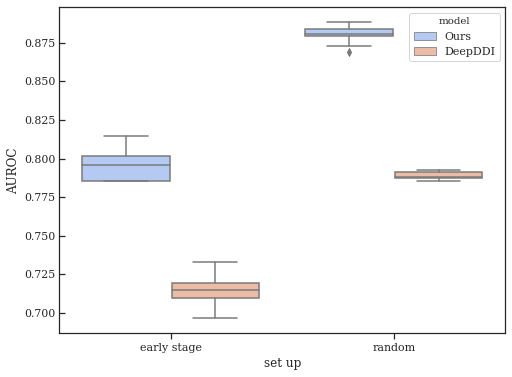

In [12]:
# twosides - roc
plt.figure(figsize=(8, 6))
sns.boxplot(x="set up",y="AUROC",hue="model",data=result, palette="coolwarm")
plt.savefig("figures/twos_roc.png")

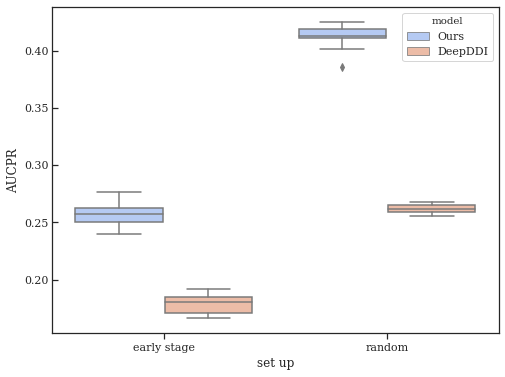

In [13]:
# twosides - roc
plt.figure(figsize=(8, 6))
sns.boxplot(x="set up",y="AUCPR",hue="model",data=result, palette="coolwarm")
plt.savefig("figures/twos_aup.png")

In [23]:

# a refaire
mini_res = result[(result["set up"].isin(["early stage", "random"])) & (result["model"] == "Ours")]
mini_res["model"] = ["TT"] * len(mini_res)
mini_res.rename(columns={'model':'Hierachy Level'}, 
                 inplace=True)
mini_res

/home/rogia/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rogia/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Hierachy Level,set up,seed,AUROC,AUCPR
0,TT,early stage,64,0.785390,0.239783
1,TT,early stage,0,0.785382,0.261792
2,TT,early stage,10,0.814258,0.276474
3,TT,early stage,55,0.804616,0.253753
4,TT,early stage,21,0.801396,0.250223
5,TT,early stage,101,0.792100,0.243124
6,TT,early stage,505,0.800438,0.257328
7,TT,early stage,33,0.795962,0.266375
8,TT,early stage,350,0.785482,0.262191
9,TT,random,55,0.888355,0.424954


In [24]:
# ici, c'est notre modèle mais avec les parametres de prud
mini_nres = describe_all_experiments("/home/rogia/Documents/analysis/results/drug_drug_TT")
mini_nres = mini_nres[["dataset_params.split_mode", "dataset_params.seed", "micro_roc", "micro_auprc"]]
mini_nres["dataset_params.use_as_filter"] = ["TT"] * len(mini_nres)                     

In [25]:
df = describe_all_experiments(out_path)
df.replace("PT", "LLT", inplace=True)
df = pd.concat([df, mini_nres], sort=False)
df.replace("leave_drugs_out", "early stage", inplace=True)
df

,checkpoint_path,dataset_params.dataset_name,dataset_params.decagon,dataset_params.seed,dataset_params.split_mode,dataset_params.test_size,dataset_params.transformer,dataset_params.use_as_filter,dataset_params.use_side_effects_mapping,dataset_params.valid_size,...,model_params.network_params.mode,model_params.network_params.output_dim,model_params.optimizer,model_params.use_negative_sampled_loss,restore_path,macro_roc,macro_auprc,micro_roc,micro_auprc,task_id
0,NaN,twosides,False,350,random,0.15,seq,LLT,True,0.1,...,concat,932.0,adam,False,NaN,0.797717,0.303050,0.866690,0.391424,fbea540df0c412db6e73486b1843d8137cfb3065
1,NaN,twosides,False,10,early stage,0.15,seq,LLT,True,0.1,...,concat,932.0,adam,False,NaN,0.561250,0.114402,0.786638,0.239811,bc694aeafdede990464ba6d32f9f105dd61a3835
2,NaN,twosides,False,42,early stage,0.15,seq,SOC,True,0.1,...,concat,24.0,adam,False,NaN,0.540493,0.639253,0.825331,0.856786,2677e071f41e01db7b4bed6373a30e1bb1f24dc9
3,NaN,twosides,False,350,random,0.15,seq,HLT,True,0.1,...,concat,504.0,adam,False,NaN,0.777063,0.335163,0.865691,0.499207,35b7f3a676f1e18c9d3205a566eb4f76c5fc589d
4,NaN,twosides,False,33,random,0.15,seq,SOC,True,0.1,...,concat,24.0,adam,False,NaN,0.803223,0.824326,0.896361,0.932313,e8a6ca08d624e3d4b35e077879322bdbe99540df
5,NaN,twosides,False,55,random,0.15,seq,HLT,True,0.1,...,concat,504.0,adam,False,NaN,0.798194,0.363134,0.874084,0.517513,0002d72855e381da5fc02c65e063b755caf9020a
6,NaN,twosides,False,21,random,0.15,seq,SOC,True,0.1,...,concat,24.0,adam,False,NaN,0.786403,0.806740,0.890129,0.926437,25aaf54159274d80f50439509b88099dc07a1a61
7,NaN,twosides,False,0,random,0.15,seq,SOC,True,0.1,...,concat,24.0,adam,False,NaN,0.789068,0.814437,0.890172,0.927243,504fe96553cc04d1f96d29602f74e5614f968b9c
8,NaN,twosides,False,42,early stage,0.15,seq,HLT,True,0.1,...,concat,504.0,adam,False,NaN,0.594449,0.172641,0.798090,0.352726,7276d542a325a166478141ce82dc10a3f6ca254f
9,NaN,twosides,False,33,early stage,0.15,seq,HLGT,True,0.1,...,concat,203.0,adam,False,NaN,0.636524,0.295608,0.813974,0.538662,864c65c5afea872b5bbdd64077d505993ed98a2d


In [26]:
t = df.groupby(['dataset_params.split_mode', 'dataset_params.use_as_filter', 'dataset_params.seed'], as_index=False).max()
t.rename(columns={'dataset_params.use_as_filter':'Vocabulary',
                          'dataset_params.split_mode':'set up',
                          'micro_roc':'AUROC',
               "micro_auprc":"AUCPR", "dataset_params.seed":"seed"}, 
                 inplace=True)
t = t[["set up", "Vocabulary", "seed", "AUROC", "AUCPR"]]
t

,set up,Vocabulary,seed,AUROC,AUCPR
0,early stage,HLGT,0,0.811568,0.514584
1,early stage,HLGT,10,0.819827,0.531968
2,early stage,HLGT,21,0.815355,0.546683
3,early stage,HLGT,33,0.813974,0.538662
4,early stage,HLGT,42,0.803548,0.516725
5,early stage,HLGT,55,0.815744,0.551394
6,early stage,HLGT,64,0.814442,0.547810
7,early stage,HLGT,101,0.809051,0.544683
8,early stage,HLGT,350,0.810484,0.529442
9,early stage,HLGT,505,0.807926,0.525748


In [27]:
g = t.groupby(["set up", "Vocabulary"])["AUROC", "AUCPR"].mean()
g.to_excel("temp.xlsx")
g

AUROC     AUCPR
set up      Vocabulary                    
early stage HLGT        0.812192  0.534770
            HLT         0.800394  0.356062
            LLT         0.785260  0.247132
            SOC         0.827334  0.862499
            TT          0.781089  0.234368
random      HLGT        0.873143  0.675121
            HLT         0.869694  0.508732
            LLT         0.864725  0.383666
            SOC         0.892346  0.928757
            TT          0.859933  0.364743

In [9]:
from math import sqrt

In [28]:
g = t.groupby(["set up", "Vocabulary"])["AUROC", "AUCPR"].std()
g["incert-AUROC"] = g["AUROC"]/sqrt(10)
g["incert-AUCPR"] = g["AUCPR"]/sqrt(10)
g

AUROC     AUCPR  incert-AUROC  incert-AUCPR
set up      Vocabulary                                                
early stage HLGT        0.004658  0.013134      0.001473      0.004153
            HLT         0.006488  0.008152      0.002052      0.002578
            LLT         0.006561  0.010740      0.002075      0.003396
            SOC         0.004788  0.007744      0.001514      0.002449
            TT          0.005703  0.006673      0.001803      0.002110
random      HLGT        0.004831  0.010070      0.001528      0.003185
            HLT         0.008846  0.019620      0.002797      0.006204
            LLT         0.004384  0.008958      0.001386      0.002833
            SOC         0.002513  0.002451      0.000795      0.000775
            TT          0.006164  0.012287      0.001949      0.003885

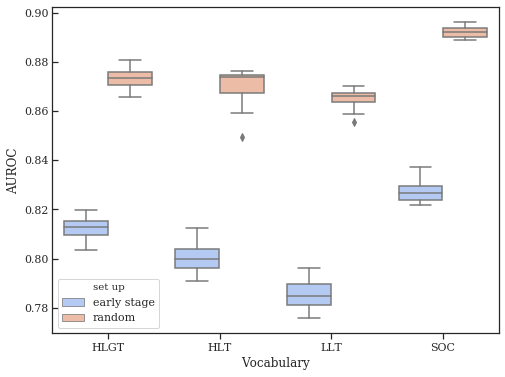

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(hue="set up",y="AUROC",x="Vocabulary",data=t, palette="coolwarm")
#plt.savefig("figures/twos_roc_medra.png")

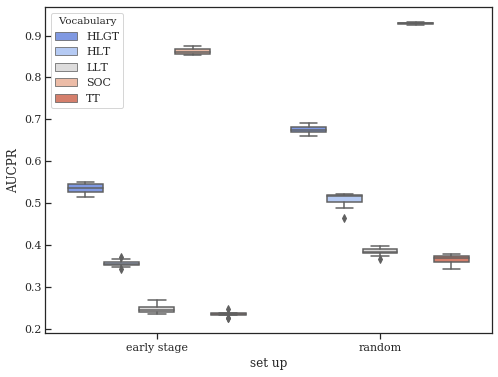

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="set up",y="AUCPR",hue="Vocabulary",data=t, palette="coolwarm")
plt.savefig("figures/twos_aup_medra.png")

In [42]:
# deepddi
df = describe_all_experiments(out)
results =df.groupby(['dataset_params.split_mode'], as_index=False)[['micro_roc','micro_auprc']].mean()
results

,dataset_params.split_mode,micro_roc,micro_auprc
0,leave_drugs_out,0.816410,0.843485
1,random,0.856308,0.885925


In [29]:
labels = list(data.groupby('system_organ_class').groups.keys())
labels.sort()
labels
labels.remove('Unspecified')
len(labels)

26

In [7]:
# seed 350 random
import pickle
y_pred = pickle.load(open("/home/rogia/Documents/analysis/results/MEDRA/e88500cb6ce9c38c1a217755013f6acab2172741/twosides_bmnddi_4f765c39_preds.pkl", "rb"))
y_true = pickle.load(open("/home/rogia/Documents/analysis/results/MEDRA/e88500cb6ce9c38c1a217755013f6acab2172741/twosides_bmnddi_4f765c39_targets.pkl", "rb"))

y_pred_2 =  pickle.load(open("/home/rogia/Documents/analysis/results/test_medra+deepddi/760f547da57414ab7a6d49cfb2eebc704f4e76cc/twosides_deepddi_ee121723_preds.pkl", "rb"))
y_true_2 = pickle.load(open("/home/rogia/Documents/analysis/results/test_medra+deepddi/760f547da57414ab7a6d49cfb2eebc704f4e76cc/twosides_deepddi_ee121723_targets.pkl", "rb"))

In [19]:
path = "/home/rogia/Documents/analysis/results/RES/a5ba2b5ecccb1020fdd2eba46cc35326ae5066d6/"
y_pred = pickle.load(open(path + "twosides_bmnddi_48f2c068_preds.pkl", "rb"))
y_true = pickle.load(open(path + "twosides_bmnddi_48f2c068_targets.pkl", "rb"))

x = average_precision_score(y_true, y_pred, average="micro")
y = average_precision_score(y_true, y_pred, average="macro")
z = average_precision_score(y_true, y_pred, average="weighted")
w = average_precision_score(y_true, y_pred, average="samples")

In [20]:
x, y, z, w

(0.24276746970589094,
 0.2361797739934999,
 0.35640072698645114,
 0.2362175968877372)

In [13]:
path = ""
y_pred = pickle.load(open(path + "predicted_labels.pkl", "rb"))
y_true = pickle.load(open(path + "true_labels.pkl", "rb"))

x = average_precision_score(y_true, y_pred, average="micro")
y = average_precision_score(y_true, y_pred, average="macro")
z = average_precision_score(y_true, y_pred, average="weighted")

In [14]:
x, y, z

(0.34723496242227425, 0.21036853461711297, 0.32555877056524885)

In [19]:
from sklearn.metrics import average_precision_score, roc_auc_score

In [45]:
avg = average_precision_score(y_true, y_pred, average=None).tolist()
avg2 = average_precision_score(y_true_2, y_pred_2, average=None).tolist()
roc = roc_auc_score(y_true, y_pred, average=None).tolist()
roc2 = roc_auc_score(y_true_2, y_pred_2, average=None).tolist()

In [46]:
import seaborn as sns
import numpy as np

def draw_spider_chart(fig, labels, val):
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False) 
    stats = val[0]
    ax = fig.add_subplot(111, polar=True)   #
    ax.plot(angles, stats, 'o-', linewidth=2) 
    ax2 = fig.add_subplot(111, polar=True)   #
    ax.plot(angles, val[1], '-', linewidth=2)
    
    ax.fill(angles,stats, alpha=0.25)  
    ax.set_thetagrids(angles * 180/np.pi, labels) 
    ax.grid(True)

/home/rogia/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


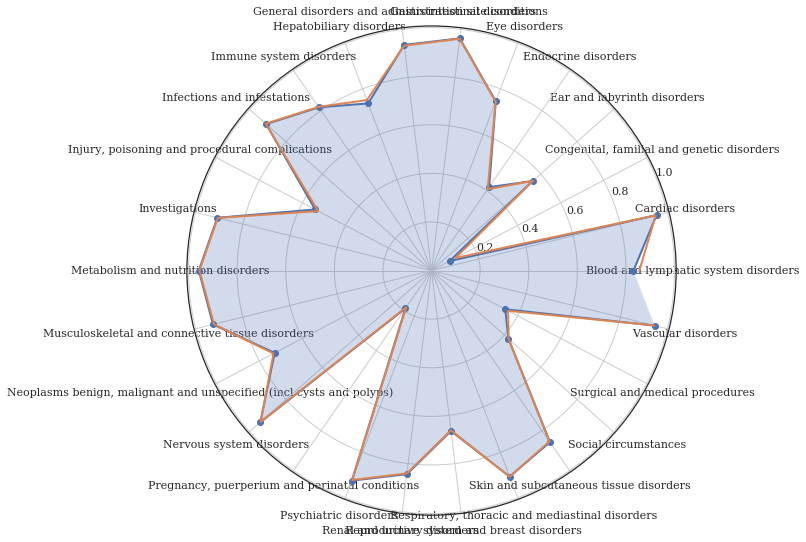

In [47]:
fig=plt.figure(figsize=(9, 9))
draw_spider_chart(fig, labels, [avg, avg2])

/home/rogia/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


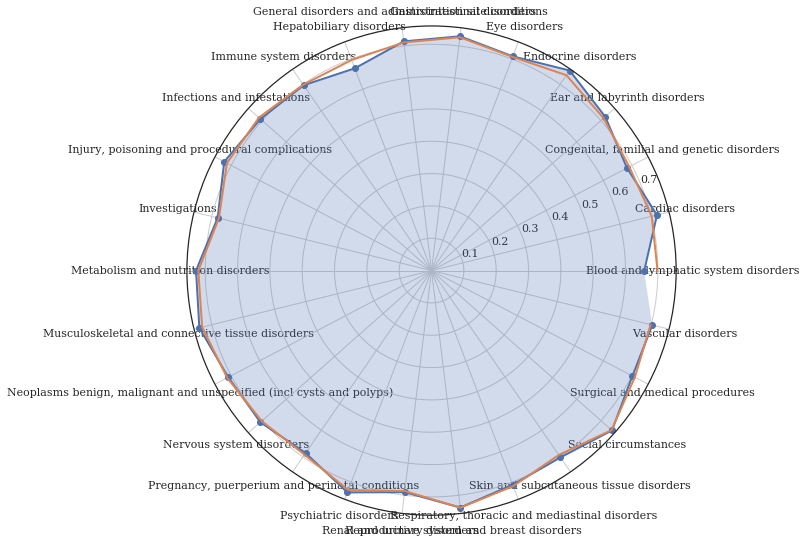

In [48]:
fig=plt.figure(figsize=(9, 9))
draw_spider_chart(fig, labels, [roc, roc2])

In [2]:
a = describe_all_experiments("/home/rogia/Documents/analysis/results/temp")
a

,checkpoint_path,dataset_params.dataset_name,dataset_params.decagon,dataset_params.seed,dataset_params.split_mode,dataset_params.test_size,dataset_params.transformer,dataset_params.use_side_effects_mapping,dataset_params.valid_size,fit_params.batch_size,...,model_params.network_params.mode,model_params.network_params.output_dim,model_params.optimizer,model_params.use_negative_sampled_loss,restore_path,macro_roc,macro_auprc,micro_roc,micro_auprc,task_id
0,None,drugbank,False,42,random,0.15,seq,False,0.1,256,...,max,86,adam,False,None,0.678676,0.618452,0.996069,0.866456,e17d67dad55602a01899c4b40a9ab061d51fd386
1,None,twosides,False,42,leave_drugs_out,0.15,seq,False,0.1,256,...,elementwise,964,adam,False,None,0.556789,0.122333,0.774597,0.230401,72bbfca0a346c0bbeed31c28a97ad1bb70e06282
2,None,drugbank,False,42,leave_drugs_out,0.15,seq,False,0.1,256,...,max,86,adam,False,None,0.647533,0.490732,0.969071,0.547427,e101fe3bbeca8487e4035d20d9f771225f0f5bf8
3,None,twosides,False,42,leave_drugs_out,0.15,seq,False,0.1,256,...,max,964,adam,False,None,0.546913,0.110329,0.777058,0.230783,b1717ac1b3f73653bb313160e44588b5bb0f2d09
4,None,twosides,False,42,leave_drugs_out,0.15,seq,False,0.1,256,...,sum,964,adam,False,None,0.572917,0.127446,0.779532,0.233395,9e12c6f4a1dc8bde8ee29b9e30a8de1f239dfffa
5,None,drugbank,False,42,leave_drugs_out,0.15,seq,False,0.1,256,...,elementwise,86,adam,False,None,0.643509,0.469544,0.968471,0.462035,65a08f3158cb3b7d69299be9345bab9227da9c97
6,None,twosides,False,42,random,0.15,seq,False,0.1,256,...,max,964,adam,False,None,0.774973,0.272025,0.851923,0.350731,3e6a7ec3dde069e7ba5638849a64281a59848887
7,None,twosides,False,42,random,0.15,seq,False,0.1,256,...,sum,964,adam,False,None,0.798089,0.297586,0.862075,0.370991,82eeda5532cbfb9e944c194d04a9c08ff05f0980
8,None,twosides,False,42,random,0.15,seq,False,0.1,256,...,elementwise,964,adam,False,None,0.740094,0.243468,0.831060,0.309394,22f424b196aa51ce67f7900e3f59d309154fc05d
9,None,drugbank,False,42,leave_drugs_out,0.15,seq,False,0.1,256,...,sum,86,adam,False,None,0.641844,0.484258,0.964904,0.505788,0c2de2653441bc7b43ccce7e77f342785869c6b9


In [8]:
a.groupby(["dataset_params.dataset_name", "dataset_params.split_mode", "model_params.network_params.mode"])[["micro_roc", "micro_auprc"]].max()

micro_roc  \
dataset_params.dataset_name dataset_params.split_mode model_params.network_params.mode              
drugbank                    leave_drugs_out           elementwise                        0.968471   
                                                      max                                0.969071   
                                                      sum                                0.964904   
                            random                    max                                0.996069   
twosides                    leave_drugs_out           elementwise                        0.774597   
                                                      max                                0.777058   
                                                      sum                                0.779532   
                            random                    elementwise                        0.831060   
                                                      max                                0.851923   
                                                      sum                                0.862075   

                                                                                        micro_auprc  
dataset_params.dataset_name dataset_params.split_mode model_params.network_params.mode               
drugbank                    leave_drugs_out           elementwise                          0.462035  
                                                      max                                  0.547427  
                                                      sum                                  0.505788  
                            random                    max                                  0.866456  
twosides                    leave_drugs_out           elementwise                          0.230401  
                                                      max                                  0.230783  
                                                      sum                                  0.233395  
                            random                    elementwise                          0.309394  
                                                      max                                  0.350731  
                                                      sum                                  0.370991

### IMPACT OF DRUGBANK PHARMACOLOGIC EFFECTS ON TWOSIDES PREDICTIVE RESULTs

In [26]:
from side_effects.graphics import describe_all_experiments
a = describe_all_experiments("/media/rogia/ROGIA/result/test", prefix="home/ptossou/.invivo/result/Exp_pharma/")
a.replace("PT", "LLT", inplace=True)
a.fillna(value='none', inplace=True)

In [27]:
t = a.groupby(['dataset_params.split_mode', 'dataset_params.use_as_filter', 'dataset_params.seed'], as_index=False).max()
t.rename(columns={'dataset_params.use_as_filter':'Vocabulary',
                          'dataset_params.split_mode':'set up',
                          'micro_roc':'AUROC',
               "micro_auprc":"AUCPR", "dataset_params.seed":"seed"}, 
                 inplace=True)
t = t[["set up", "Vocabulary", "seed", "AUROC", "AUCPR"]]
t

,set up,Vocabulary,seed,AUROC,AUCPR
0,leave_drugs_out,HLGT,10,0.809179,0.569653
1,leave_drugs_out,HLGT,21,0.810257,0.567234
2,leave_drugs_out,HLGT,33,0.812062,0.562638
3,leave_drugs_out,HLGT,42,0.802953,0.561188
4,leave_drugs_out,HLGT,55,0.798770,0.562520
5,leave_drugs_out,HLGT,64,0.811697,0.560202
6,leave_drugs_out,HLGT,101,0.802749,0.546847
7,leave_drugs_out,HLGT,350,0.796572,0.560261
8,leave_drugs_out,HLGT,505,0.811915,0.570721
9,leave_drugs_out,HLT,10,0.803241,0.397978


In [28]:
g = t.groupby(["set up", "Vocabulary"])["AUROC", "AUCPR"].mean()
g

AUROC     AUCPR
set up          Vocabulary                    
leave_drugs_out HLGT        0.806239  0.562363
                HLT         0.800401  0.391094
                LLT         0.777284  0.257932
                none        0.777269  0.257588
random          HLGT        0.864576  0.685865
                HLT         0.851955  0.504707
                LLT         0.838730  0.359832
                none        0.838730  0.359832

### ADME PRE-TRAINED

In [29]:
a = describe_all_experiments("/media/rogia/ROGIA/result/test-2", prefix="home/ptossou/.invivo/result/Exp_pharma_pretrained/")
a.replace("PT", "LLT", inplace=True)
a.fillna(value='none', inplace=True)
t = a.groupby(['dataset_params.split_mode', 'dataset_params.use_as_filter', 'dataset_params.seed'], as_index=False).max()
t.rename(columns={'dataset_params.use_as_filter':'Vocabulary',
                          'dataset_params.split_mode':'set up',
                          'micro_roc':'AUROC',
               "micro_auprc":"AUCPR", "dataset_params.seed":"seed"}, 
                 inplace=True)
t = t[["set up", "Vocabulary", "seed", "AUROC", "AUCPR"]]
t

,set up,Vocabulary,seed,AUROC,AUCPR
0,leave_drugs_out,HLGT,0,0.796956,0.549037
1,leave_drugs_out,HLGT,10,0.808355,0.565225
2,leave_drugs_out,HLGT,21,0.792443,0.548430
3,leave_drugs_out,HLGT,33,0.798542,0.533575
4,leave_drugs_out,HLGT,42,0.801078,0.557380
5,leave_drugs_out,HLGT,55,0.798263,0.563148
6,leave_drugs_out,HLGT,64,0.811364,0.561613
7,leave_drugs_out,HLGT,101,0.800170,0.546188
8,leave_drugs_out,HLGT,350,0.806631,0.577210
9,leave_drugs_out,HLGT,505,0.803564,0.548052


In [30]:
g = t.groupby(["set up", "Vocabulary"])["AUROC", "AUCPR"].mean()
g

AUROC     AUCPR
set up          Vocabulary                    
leave_drugs_out HLGT        0.801737  0.554986
                HLT         0.794041  0.379712
                LLT         0.770329  0.251518
                none        0.767121  0.247302
random          HLGT        0.862111  0.681074
                HLT         0.854315  0.508923
                LLT         0.838254  0.358390
                none        0.838254  0.358390